In [2]:

from matplotlib import pyplot as plt
import numpy as np

import pandas as pd


# 1

In [3]:
def gini(x):
    # (Warning: This is a concise implementation, but it is O(n**2)
    # in time and memory, where n = len(x).  *Don't* pass in huge
    # samples!)

    # Mean absolute difference
    mad = np.abs(np.subtract.outer(x, x)).mean()
    # Relative mean absolute difference
    rmad = mad/np.mean(x)
    # Gini coefficient
    g = 0.5 * rmad
    return g

In [4]:
# get 1000 random numbers between 0 and 10000
income_of_all_people = np.random.rand(1000)*10000
print(gini(income_of_all_people))

0.33493377028652077


In [21]:
# load the data income.html
tabel = pd.read_html("income.html")

In [22]:
income_distribution_by_percentile = tabel[0]

In [23]:
# drop the 0 and 1 column
income_distribution_by_percentile = income_distribution_by_percentile.drop(index=[0, 1], axis=0)
#drop 2011 ,2012 and 2023
income_distribution_by_percentile = income_distribution_by_percentile.drop(columns=['2011', '2012', '2023'])
income_distribution_by_percentile

,Unnamed: 0,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,Percentile 1,-0.2,-0.2,-0.2,-0.2,-0.1,-0.1,-0.2,-0.2,-0.1,-0.2
3,Percentile 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Percentile 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Percentile 4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Percentile 5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
97,Percentile 96,2.5,2.6,2.6,2.5,2.5,2.5,2.5,2.5,2.5,2.5
98,Percentile 97,2.8,2.8,2.8,2.8,2.8,2.7,2.7,2.7,2.8,2.7
99,Percentile 98,3.1,3.2,3.3,3.3,3.3,3.1,3.1,3.1,3.2,3.2
100,Percentile 99,3.8,4.0,4.2,4.2,4.2,3.9,3.9,3.9,4.2,4.1


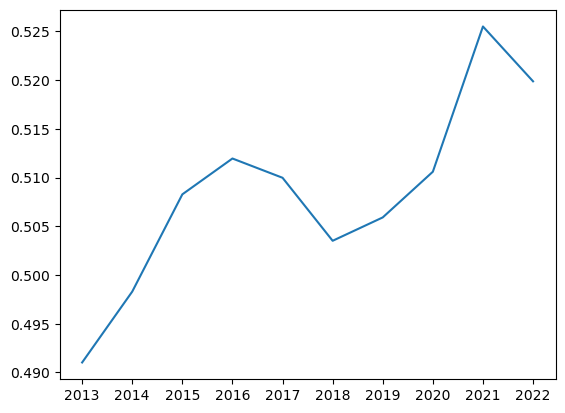

In [24]:
#
years = income_distribution_by_percentile.columns[1:]
ginis = []
for year in years:
    ginis.append( gini(list(income_distribution_by_percentile[year])))
plt.plot(years, ginis)

#gini(income_distribution_by_percentile['2011'])

In [104]:
def iso_gini(x,l,u):
    """ Returns the value of the Lorenz curve at p """

    lower = int(l * len(x))
    upper = int(u * len(x))
    print(lower, upper)
    return gini(x[lower:upper])

In [25]:
# plot the iso gini curve for p = 0.2, 0.4, 0.6, 0.8 and all years

plt.figure(figsize=(10, 6))

 # values form 0.1 to 1 in steps of 0.1
p_values = [[0, 0.4], [0.4,0.8], [0.8, 0.99]]
print(p_values)
for p in p_values:
    iso_gini_values = []
    for year in years:
        iso_gini_values.append(iso_gini(list(income_distribution_by_percentile[year]), p[0], p[1]))
    plt.plot(years, iso_gini_values, marker='o', label=f"p={p}")

plt.xlabel("Year")
plt.ylabel("Iso Gini Coefficient")
plt.title("Iso-Gini Curves for Selected p-values")
plt.legend(title="Parameters")
plt.grid(True)
plt.tight_layout()
plt.show()

[[0, 0.4], [0.4, 0.8], [0.8, 0.99]]


NameError: name 'iso_gini' is not defined

<Figure size 1000x600 with 0 Axes>

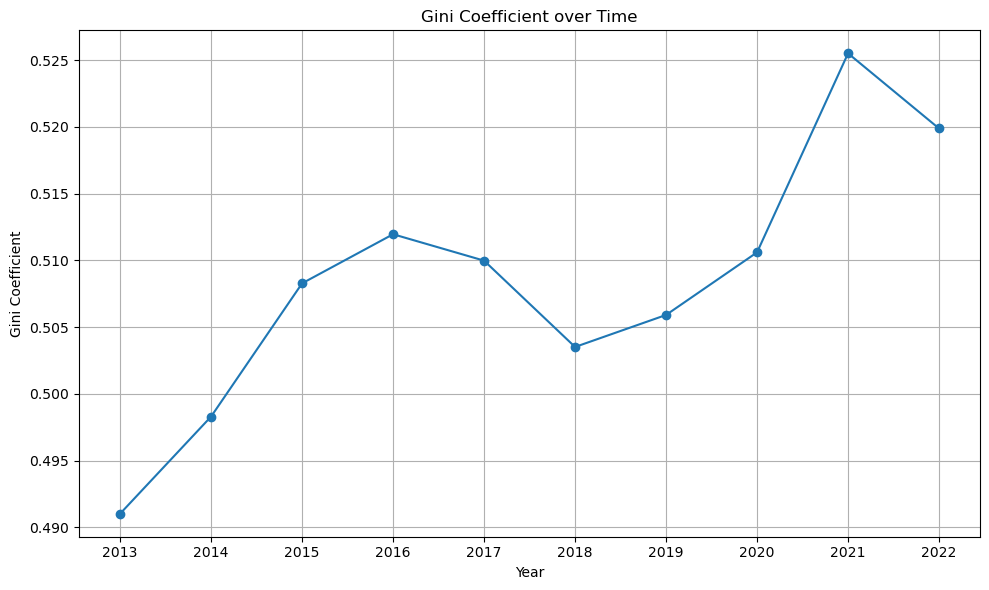

In [26]:
# do a plot on only gini
plt.figure(figsize=(10, 6))
plt.plot(years, ginis, marker='o')
plt.xlabel("Year")
plt.ylabel("Gini Coefficient")
plt.title("Gini Coefficient over Time")
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
# Define the data
data = {
    "Year": [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "SMEs with Online Sales (%)": [0.22, 0.24, 0.26, 0.28, 0.30, 0.30, 0.30, 0.31, 0.33, 0.33],
    "E-commerce Revenue Share (%)": ["10% (Estimate)", "12% (Estimate)", "15% (Estimate)", "16% (Estimate)", "18% (DESI)", "18% (DESI)", "18% (DESI)", "15% (DESI)", "19% (DESI)", "19% (DESI)"],
    "E-commerce Contribution (%)": ["1.1%", "1.4%", "1.95%", "2.24%", "2.7%", "2.7%", "2.7%", "2.33%", "3.13%", "3.13%"],
    "ICT Sector Contribution (%)": ["8.0%", "8.5%", "9.0%", "9.0%", "10.0%", "10.5%", "11.0%", "11.5%", "12.0%", "12.5%"],
    "Cloud/AI Contribution (%)": ["2.0%", "2.2%", "2.5%", "2.7%", "3.0%", "3.5%", "4.0%", "5.0%", "6.0%", "8.9%"],
    "Total Digital Economy Share (%)": ["11.1%", "12.1%", "13.5%", "13.9%", "15.7%", "16.7%", "17.7%", "18.8%", "21.1%", "24.5%"]
}

# Create the DataFrame
digtal_indicators = pd.DataFrame(data)

# Display the DataFrame
print(digtal_indicators)

   Year  SMEs with Online Sales (%) E-commerce Revenue Share (%)  \
0  2013                        0.22               10% (Estimate)   
1  2014                        0.24               12% (Estimate)   
2  2015                        0.26               15% (Estimate)   
3  2016                        0.28               16% (Estimate)   
4  2017                        0.30                   18% (DESI)   
5  2018                        0.30                   18% (DESI)   
6  2019                        0.30                   18% (DESI)   
7  2020                        0.31                   15% (DESI)   
8  2021                        0.33                   19% (DESI)   
9  2022                        0.33                   19% (DESI)   

  E-commerce Contribution (%) ICT Sector Contribution (%)  \
0                        1.1%                        8.0%   
1                        1.4%                        8.5%   
2                       1.95%                        9.0%   
3      

In [38]:
digtal_indicators["Gini Coefficient"] = ginis
# Ensure the columns are strings before using the .str accessor
for col in digtal_indicators.columns[1:-1]:
    digtal_indicators[col] = digtal_indicators[col].astype(str).str.extract(r'(\d+\.\d+|\d+)%').astype(float)


# Calculate the correlation matrix
correlation_matrix = digtal_indicators.corr()
print(digtal_indicators)
# Display the correlation matrix
print(correlation_matrix)

   Year  SMEs with Online Sales (%)  E-commerce Revenue Share (%)  \
0  2013                         NaN                          10.0   
1  2014                         NaN                          12.0   
2  2015                         NaN                          15.0   
3  2016                         NaN                          16.0   
4  2017                         NaN                          18.0   
5  2018                         NaN                          18.0   
6  2019                         NaN                          18.0   
7  2020                         NaN                          15.0   
8  2021                         NaN                          19.0   
9  2022                         NaN                          19.0   

   E-commerce Contribution (%)  ICT Sector Contribution (%)  \
0                         1.10                          8.0   
1                         1.40                          8.5   
2                         1.95                     

In [41]:
import pandas as pd

# Define the data
data = {
    "Year": [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "SMEs with Online Sales (%)": [0.22, 0.24, 0.26, 0.28, 0.30, 0.30, 0.30, 0.31, 0.33, 0.33],
    "E-commerce Revenue Share (%)": [10, 12, 15, 16, 18, 18, 18, 15, 19, 19],
    "E-commerce Contribution (%)": [1.1, 1.4, 1.95, 2.24, 2.7, 2.7, 2.7, 2.33, 3.13, 3.13],
    "ICT Sector Contribution (%)": [8.0, 8.5, 9.0, 9.0, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5],
    "Cloud/AI Contribution (%)": [2.0, 2.2, 2.5, 2.7, 3.0, 3.5, 4.0, 5.0, 6.0, 8.9],
    "Total Digital Economy Share (%)": [11.1, 12.1, 13.5, 13.9, 15.7, 16.7, 17.7, 18.8, 21.1, 24.5]
}

# Create the DataFrame
digtal_indicators = pd.DataFrame(data)

# Assuming `ginis` is your list of Gini coefficients
ginis = [0.490, 0.485, 0.490, 0.497, 0.507, 0.512, 0.511, 0.503, 0.504, 0.510]

# Add the Gini coefficients to the DataFrame
digtal_indicators["Gini Coefficient"] = ginis

# Calculate the correlation matrix
correlation_matrix = digtal_indicators.corr()

# Display the correlation matrix
#print(correlation_matrix)

# Identify the most relevant indicators based on their correlation with the Gini coefficient
relevance = correlation_matrix["Gini Coefficient"].sort_values(ascending=False)
print(relevance)

Gini Coefficient                   1.000000
E-commerce Contribution (%)        0.869758
E-commerce Revenue Share (%)       0.849597
SMEs with Online Sales (%)         0.839159
Year                               0.795516
ICT Sector Contribution (%)        0.791621
Total Digital Economy Share (%)    0.741233
Cloud/AI Contribution (%)          0.597329
Name: Gini Coefficient, dtype: float64


In [42]:
from scipy.stats import pearsonr
# Calculate the correlation and p-value for each indicator with respect to the Gini coefficient
results = []
for col in digtal_indicators.columns[1:-1]:
    corr, p_value = pearsonr(digtal_indicators[col], digtal_indicators["Gini Coefficient"])
    results.append({"Indicator": col, "Correlation": corr, "P-value": p_value})

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

                         Indicator  Correlation   P-value
0       SMEs with Online Sales (%)     0.839159  0.002400
1     E-commerce Revenue Share (%)     0.849597  0.001859
2      E-commerce Contribution (%)     0.869758  0.001073
3      ICT Sector Contribution (%)     0.791621  0.006360
4        Cloud/AI Contribution (%)     0.597329  0.068231
5  Total Digital Economy Share (%)     0.741233  0.014157
